<a href="https://colab.research.google.com/github/FatimaZahraBoujrad/phishing_classification/blob/main/html_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Replace 'my_data.csv' with the actual path to your file in Google Drive
# For example: '/content/drive/MyDrive/my_folder/my_data.csv'
benign = pd.read_csv('/content/drive/MyDrive/Projet_Phishing/Dataset/bening_html_features.csv')
phishing= pd.read_csv('/content/drive/MyDrive/Projet_Phishing/Dataset/phishing_html_features.csv')



In [4]:
benign.head()

,num_forms,num_password_inputs,external_form_action,empty_form_action,mailto_form_action,num_links,external_link_ratio,empty_link_ratio,ip_link_count,num_resources,...,input_count,hidden_fields_count,has_sensitive_fields,has_marquee,has_hidden_redirect,image_count,external_images_count,cdn_images_count,brand_impersonation,facebook_cookie_harvesting
0,0,0,0,0,0,129,0.085271,0.193798,0,51,...,0,0,0,0,0,4,2,1,1,1
1,0,0,0,0,0,98,0.428571,0.000000,0,41,...,0,0,0,0,0,5,0,0,1,1
2,0,0,0,0,0,0,0.000000,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,2,0,127,0.086614,0.000000,0,106,...,10,6,0,0,0,0,0,0,1,1
4,3,0,0,0,0,86,0.000000,0.023256,0,83,...,3,0,0,0,0,9,0,0,1,1


In [5]:

phishing['label'] = 1
benign['label'] = 0

# Concaténation
df = pd.concat([phishing, benign], axis=0, ignore_index=True)

# Shuffle
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.shape


(20000, 38)

In [6]:
df['label'].value_counts(normalize=True)


,proportion
label,
0,0.5
1,0.5


In [8]:
df.isnull().sum().sort_values(ascending=False)


,0
num_forms,0
num_password_inputs,0
external_form_action,0
empty_form_action,0
mailto_form_action,0
num_links,0
external_link_ratio,0
empty_link_ratio,0
ip_link_count,0
num_resources,0


In [9]:
features_to_check = [
    'num_forms', 'external_link_ratio', 'phishing_keyword_count',
    'urgency_word_count', 'hidden_iframes'
]

df.groupby('label')[features_to_check].mean()


,num_forms,external_link_ratio,phishing_keyword_count,urgency_word_count,hidden_iframes
label,,,,,
0,1.2894,0.113267,7.8214,0.1306,0.5538
1,2.0062,0.386949,4.3829,0.1083,0.2626


In [10]:
corr = df.corr()


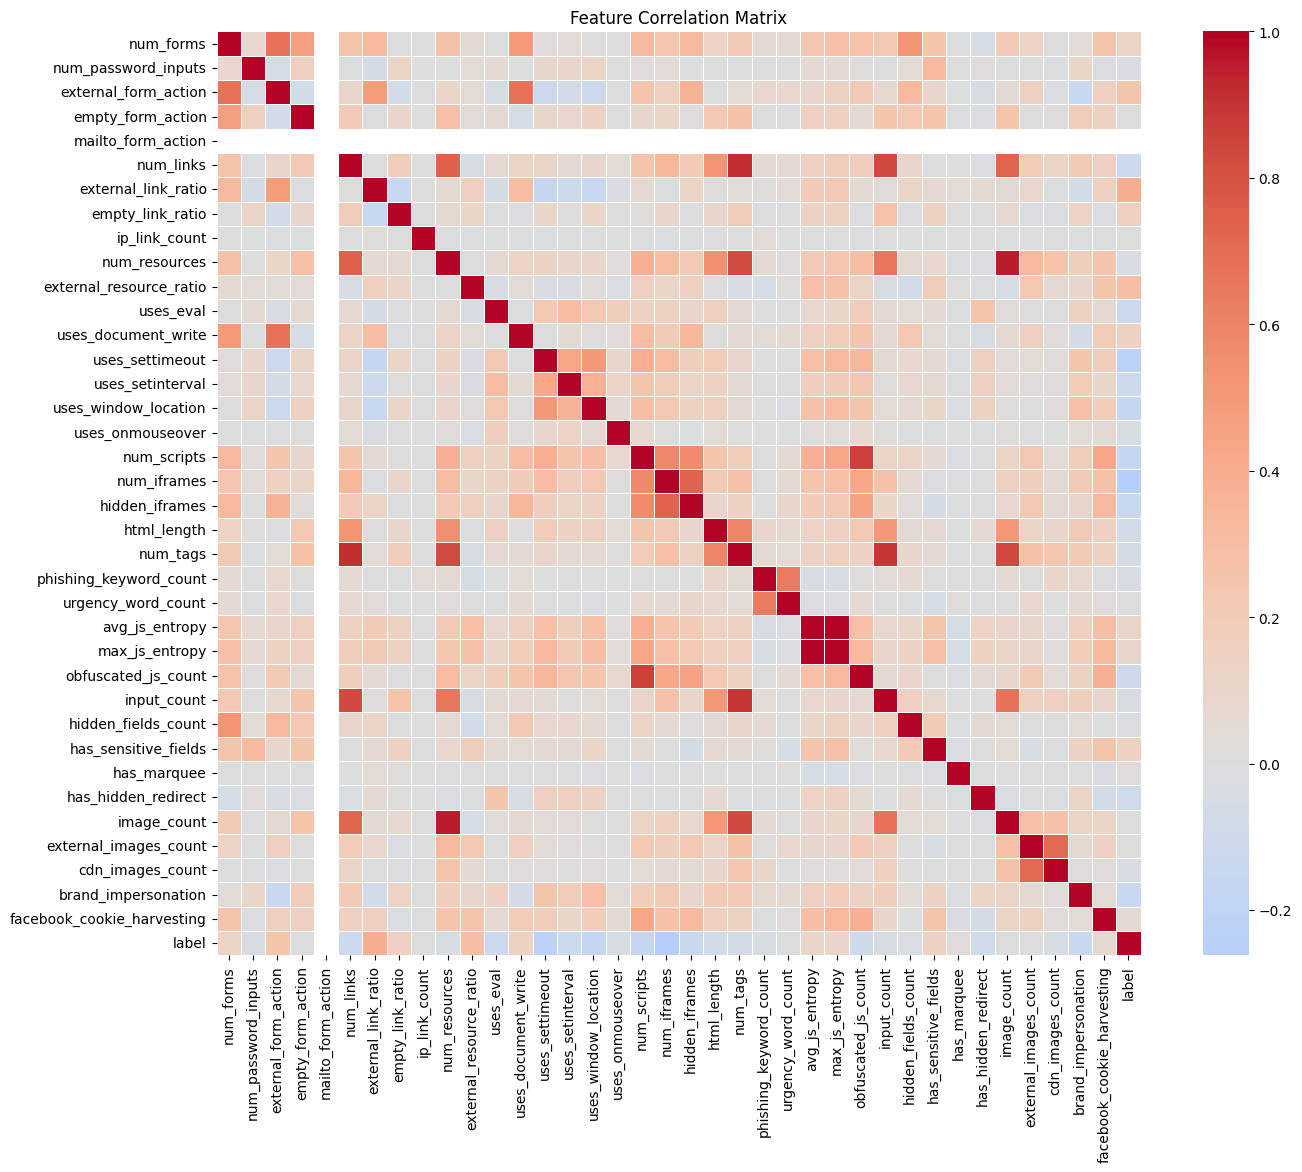

In [11]:
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5
)
plt.title("Feature Correlation Matrix")
plt.show()


In [12]:
corr_target = corr['label'].sort_values(ascending=False)

corr_target


,label
label,1.000000e+00
external_link_ratio,3.938406e-01
external_resource_ratio,2.920995e-01
external_form_action,2.490660e-01
empty_link_ratio,1.615373e-01
uses_document_write,1.391400e-01
has_sensitive_fields,1.373564e-01
num_forms,1.267995e-01
avg_js_entropy,1.117890e-01
max_js_entropy,9.504755e-02


In [13]:
corr_target[abs(corr_target) > 0.2]


,label
label,1.000000
external_link_ratio,0.393841
external_resource_ratio,0.292100
external_form_action,0.249066
uses_settimeout,-0.226878
num_iframes,-0.262059


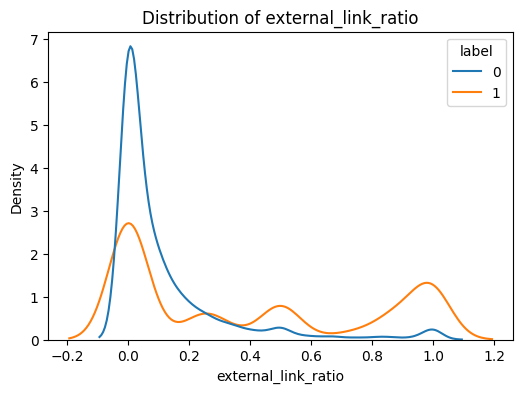

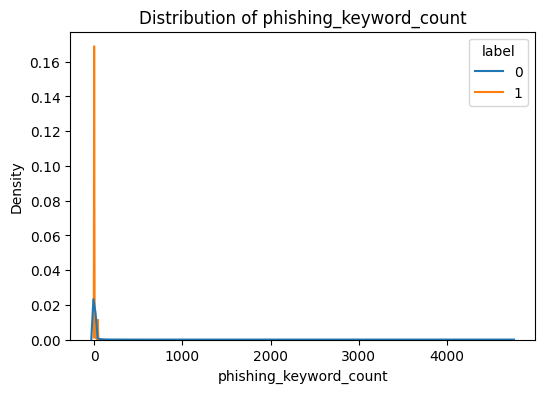

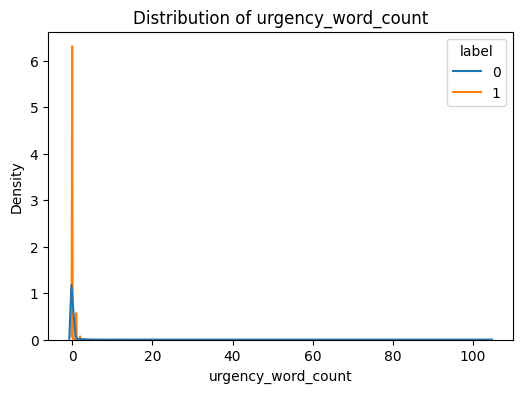

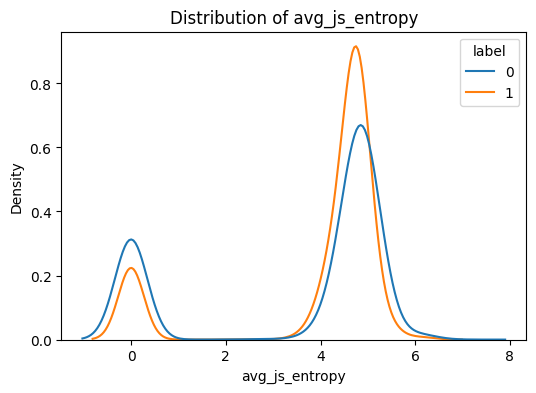

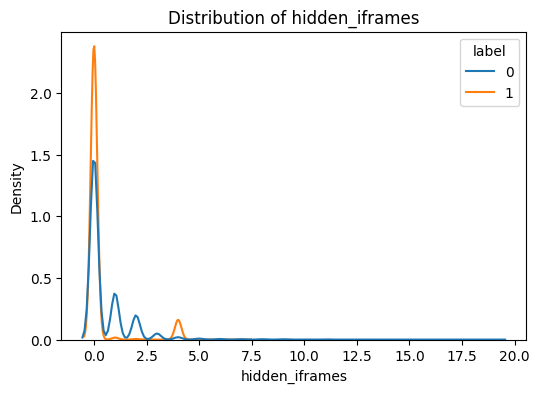

In [14]:
key_features = [
    'external_link_ratio',
    'phishing_keyword_count',
    'urgency_word_count',
    'avg_js_entropy',
    'hidden_iframes'
]

for feature in key_features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=feature, hue='label', common_norm=False)
    plt.title(f'Distribution of {feature}')
    plt.show()


In [16]:
df.drop(columns=['mailto_form_action'], inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num_forms                   20000 non-null  int64  
 1   num_password_inputs         20000 non-null  int64  
 2   external_form_action        20000 non-null  int64  
 3   empty_form_action           20000 non-null  int64  
 4   num_links                   20000 non-null  int64  
 5   external_link_ratio         20000 non-null  float64
 6   empty_link_ratio            20000 non-null  float64
 7   ip_link_count               20000 non-null  int64  
 8   num_resources               20000 non-null  int64  
 9   external_resource_ratio     20000 non-null  float64
 10  uses_eval                   20000 non-null  int64  
 11  uses_document_write         20000 non-null  int64  
 12  uses_settimeout             20000 non-null  int64  
 13  uses_setinterval            200

In [18]:
df.describe()

,num_forms,num_password_inputs,external_form_action,empty_form_action,num_links,external_link_ratio,empty_link_ratio,ip_link_count,num_resources,external_resource_ratio,...,hidden_fields_count,has_sensitive_fields,has_marquee,has_hidden_redirect,image_count,external_images_count,cdn_images_count,brand_impersonation,facebook_cookie_harvesting,label
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.64780,0.177750,0.590650,0.483050,98.27375,0.250108,0.093426,0.003200,54.806800,0.269707,...,2.535800,0.321450,0.004300,0.02790,23.591800,5.446550,2.427650,0.294150,0.226500,0.500000
std,2.82658,0.816142,2.162734,1.390615,286.56852,0.347461,0.236668,0.152941,115.976367,0.275581,...,9.367124,0.467045,0.065435,0.16469,105.340124,28.910627,27.389523,0.455671,0.418577,0.500013
min,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,0.000000,0.000000,0.000000,6.00000,0.051032,0.000000,0.000000,33.000000,0.171875,...,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,2.00000,0.000000,0.000000,1.000000,105.00000,0.473842,0.031250,0.000000,67.000000,0.500000,...,1.000000,1.000000,0.000000,0.00000,19.000000,2.000000,0.000000,1.000000,0.000000,1.000000
max,91.00000,90.000000,10.000000,73.000000,4941.00000,1.000000,1.000000,14.000000,2316.000000,1.000000,...,296.000000,1.000000,1.000000,1.00000,2229.000000,2226.000000,2221.000000,1.000000,1.000000,1.000000


## Modelisation

### Split dataset

In [44]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='label')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


## Feature scaling

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Training

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


              precision    recall  f1-score   support

           0       0.80      0.85      0.82      2000
           1       0.84      0.79      0.81      2000

    accuracy                           0.82      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.82      0.82      0.82      4000

ROC-AUC: 0.9092260000000001


In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2000
           1       0.98      0.97      0.97      2000

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000

ROC-AUC: 0.9955015


In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_gb))


              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2000
           1       0.92      0.95      0.94      2000

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.93      4000
weighted avg       0.94      0.94      0.93      4000

ROC-AUC: 0.9825139999999999


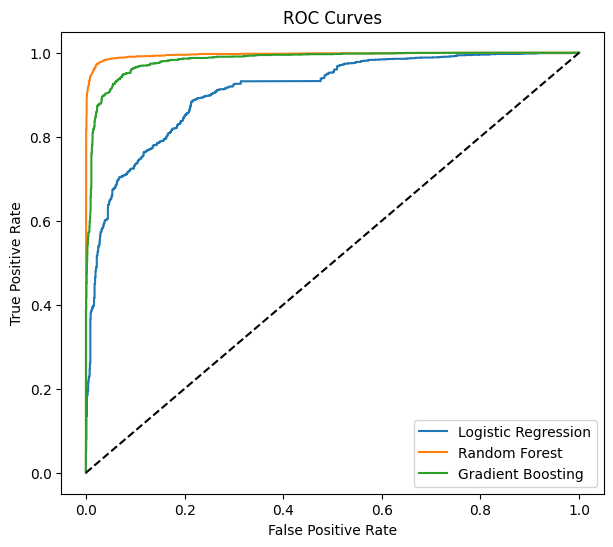

In [25]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": y_prob_lr,
    "Random Forest": y_prob_rf,
    "Gradient Boosting": y_prob_gb
}

plt.figure(figsize=(7,6))

for name, probs in models.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


In [26]:
import pandas as pd

rf_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

rf_importance.head(10)


,0
external_link_ratio,0.112916
num_tags,0.094236
html_length,0.088208
num_links,0.086008
num_scripts,0.083962
num_resources,0.061784
external_resource_ratio,0.059094
avg_js_entropy,0.052335
max_js_entropy,0.047839
num_iframes,0.041727


In [28]:
#Logistic regression coefficients
lr_coef = pd.Series(
    lr.coef_[0],
    index=X.columns
).sort_values(key=abs, ascending=False)

lr_coef.head(10)


,0
external_form_action,2.431231
image_count,1.743315
num_links,-1.677710
hidden_iframes,-1.671549
phishing_keyword_count,-1.516045
avg_js_entropy,1.231567
num_iframes,-0.995532
max_js_entropy,-0.908466
empty_link_ratio,0.824985
num_scripts,-0.759910


In [29]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_gb)
    ]
})

results


,Model,ROC-AUC
0,Logistic Regression,0.909226
1,Random Forest,0.995502
2,Gradient Boosting,0.982514


In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='auc',
    random_state=42
)

xgb.fit(X_train, y_train)

y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))
print(classification_report(y_test, (y_prob_xgb > 0.5).astype(int)))


ROC-AUC: 0.99418025
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2000
           1       0.97      0.97      0.97      2000

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



In [47]:
from sklearn.svm import SVC

svm = SVC(
    kernel='rbf',
    C=10,
    gamma='scale',
    probability=True,
    random_state=42
)

svm.fit(X_train_scaled, y_train)

y_prob_svm = svm.predict_proba(X_test_scaled)[:,1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob_svm))


ROC-AUC: 0.9662655000000001


## Deep learning for html based classification
In this section, we will use DL algorithms like MLP and Autoencoders
1. MLP





*   Learns non-linear feature interactions
*   Strong baseline for tabular phishing features



2. Autoencoder

 Learns compact latent representations

* Useful for:

* Dimensionality reduction

Noise removal

Anomaly-aware representations

In [30]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns='label').values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [32]:
mlp = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

mlp.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
early_stop = EarlyStopping(
    monitor='val_auc',
    mode='max',
    patience=10,
    restore_best_weights=True
)

history = mlp.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7583 - auc: 0.8346 - loss: 0.5029 - val_accuracy: 0.8484 - val_auc: 0.9308 - val_loss: 0.3346
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8527 - auc: 0.9228 - loss: 0.3562 - val_accuracy: 0.8709 - val_auc: 0.9404 - val_loss: 0.3097
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8639 - auc: 0.9341 - loss: 0.3263 - val_accuracy: 0.8784 - val_auc: 0.9472 - val_loss: 0.2900
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8823 - auc: 0.9441 - loss: 0.3009 - val_accuracy: 0.8853 - val_auc: 0.9517 - val_loss: 0.2782
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8843 - auc: 0.9478 - loss: 0.2913 - val_accuracy: 0.8888 - val_auc: 0.9553 - val_loss: 0.2726
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8916 - auc: 0.9517 - loss: 0.2784 - val_accuracy: 0.8956 - val_auc: 0.9588 - val_loss: 0.2595
Epoch 7/100
200/200 ━━━━━━━━━━━━━━

In [34]:
mlp.evaluate(X_test, y_test, verbose=0)


[0.19406718015670776, 0.9284999966621399, 0.9786978363990784]

In [35]:
y_prob_mlp = mlp.predict(X_test).ravel()

from sklearn.metrics import roc_auc_score, classification_report

print("ROC-AUC:", roc_auc_score(y_test, y_prob_mlp))
print(classification_report(y_test, (y_prob_mlp > 0.5).astype(int)))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC: 0.979314625
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2000
           1       0.95      0.90      0.93      2000

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000



## Autoencoders

In [36]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input


In [37]:
input_dim = X_train.shape[1]
latent_dim = 16  # paper-friendly

input_layer = Input(shape=(input_dim,))

encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
latent = Dense(latent_dim, activation='relu', name='latent')(encoded)

decoded = Dense(32, activation='relu')(latent)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, output_layer)
encoder = Model(input_layer, latent)

autoencoder.compile(
    optimizer='adam',
    loss='mse'
)


In [38]:
autoencoder.fit(
    X_train, X_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.7514 - val_loss: 0.3657
Epoch 2/100
  4/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3833  

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,val_loss
  current = self.get_monitor_value(logs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.4319 - val_loss: 0.2516
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3212 - val_loss: 0.2077
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2944 - val_loss: 0.1894
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2135 - val_loss: 0.1591
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1884 - val_loss: 0.1568
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1615 - val_loss: 0.1498
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1404 - val_loss: 0.1452
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1475 - val_loss: 0.1248
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1399 - val_loss: 0.1140
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1334 - val_loss: 0.1139
Epoch 12/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1251 - val_loss: 0.1078
Epoch 13/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/s

In [39]:
X_train_latent = encoder.predict(X_train)
X_test_latent = encoder.predict(X_test)


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [40]:
latent_mlp = Sequential([
    Dense(32, activation='relu', input_shape=(latent_dim,)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

latent_mlp.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
latent_mlp.fit(
    X_train_latent, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5450 - auc: 0.5541 - loss: 0.9399 - val_accuracy: 0.7141 - val_auc: 0.7934 - val_loss: 0.5657
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7023 - auc: 0.7633 - loss: 0.5928 - val_accuracy: 0.7644 - val_auc: 0.8442 - val_loss: 0.5158
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7432 - auc: 0.8148 - loss: 0.5384 - val_accuracy: 0.7853 - val_auc: 0.8644 - val_loss: 0.4773
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7762 - auc: 0.8461 - loss: 0.5038 - val_accuracy: 0.7978 - val_auc: 0.8815 - val_loss: 0.4489
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7831 - auc: 0.8594 - loss: 0.4759 - val_accuracy: 0.8062 - val_auc: 0.8894 - val_loss: 0.4312
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8034 - auc: 0.8702 - loss: 0.4626 - val_accuracy: 0.8225 - val_auc: 0.8978 - val_loss: 0.4165
Epoch 7/100
200/200 ━━━━━━━━━━━━━━

In [42]:
y_prob_latent = latent_mlp.predict(X_test_latent).ravel()

print("ROC-AUC:", roc_auc_score(y_test, y_prob_latent))
print(classification_report(y_test, (y_prob_latent > 0.5).astype(int)))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ROC-AUC: 0.9422977500000002
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2000
           1       0.89      0.86      0.88      2000

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000

